kd_smoother INJ in 15T, long direction.


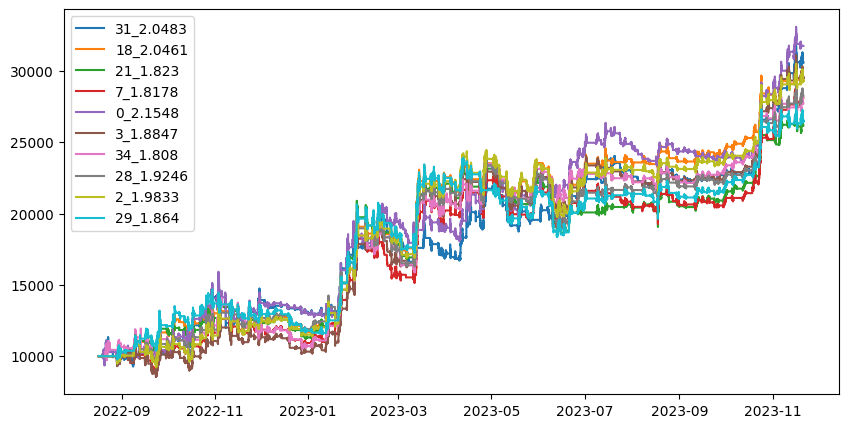

kd_smoother APT in 15T, long direction.


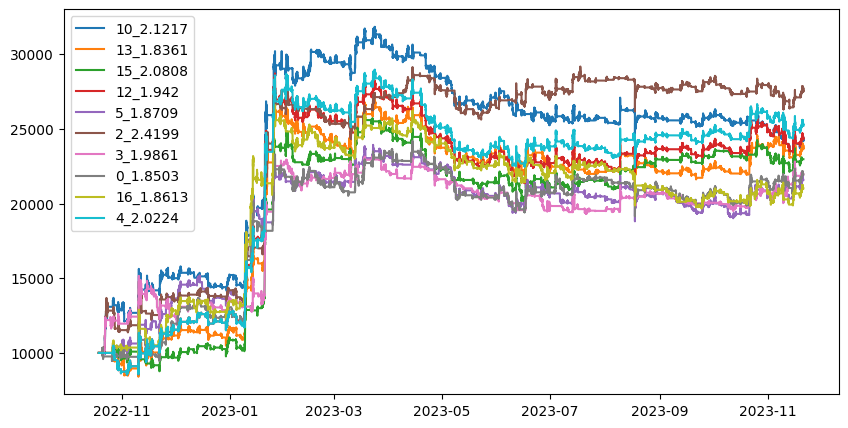

kd_smoother APT in 15T, short direction.


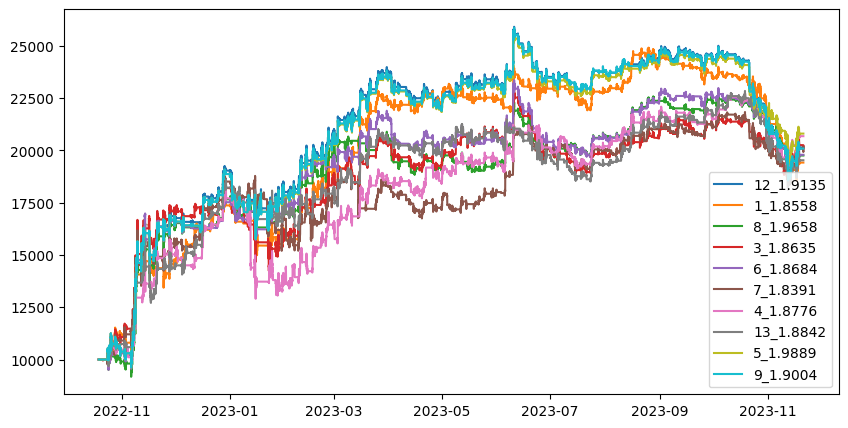

kd_smoother MANA in 15T, long direction.


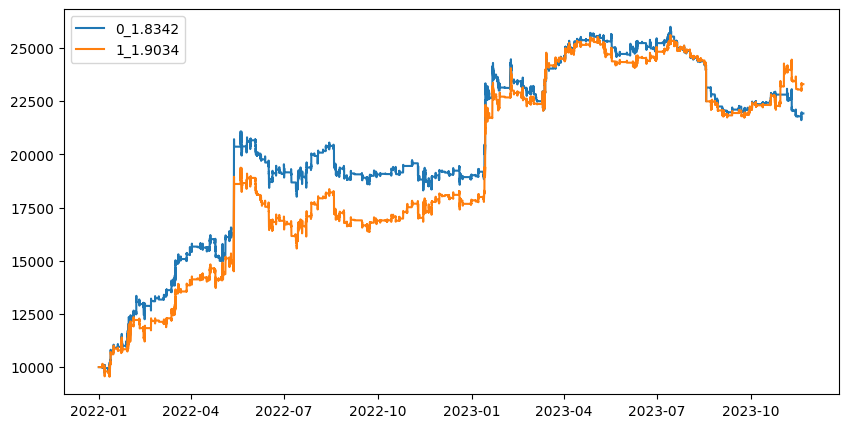

kd_smoother MANA in 15T, short direction.


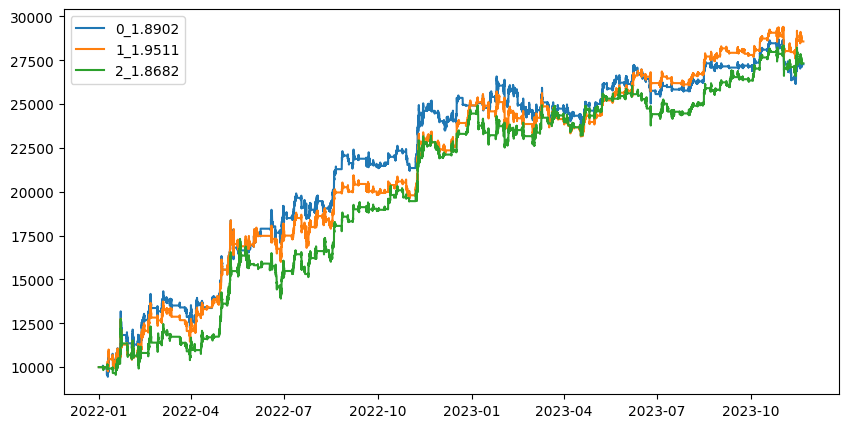

kd_smoother FET in 15T, long direction.


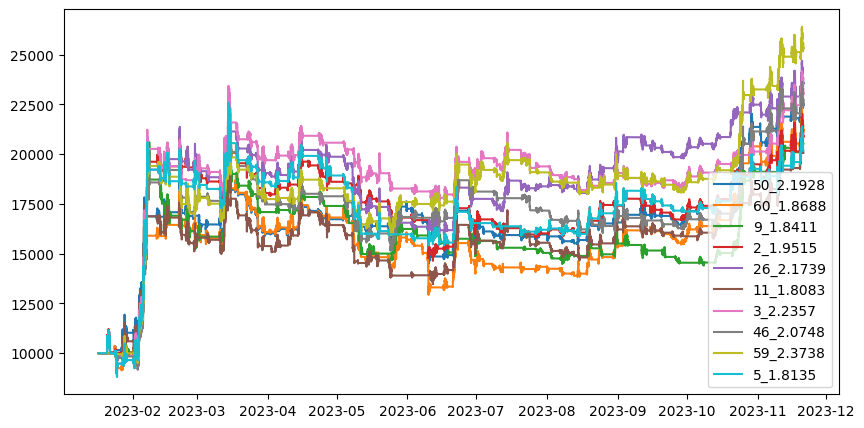

kd_smoother STX in 15T, long direction.


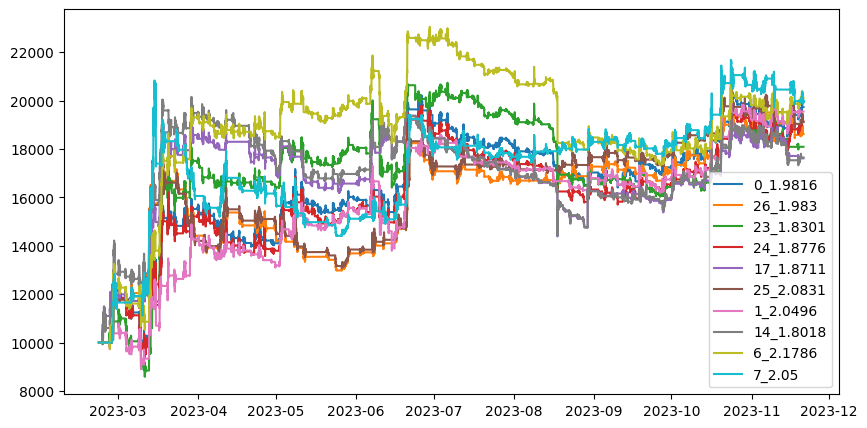

kd_smoother STX in 15T, short direction.


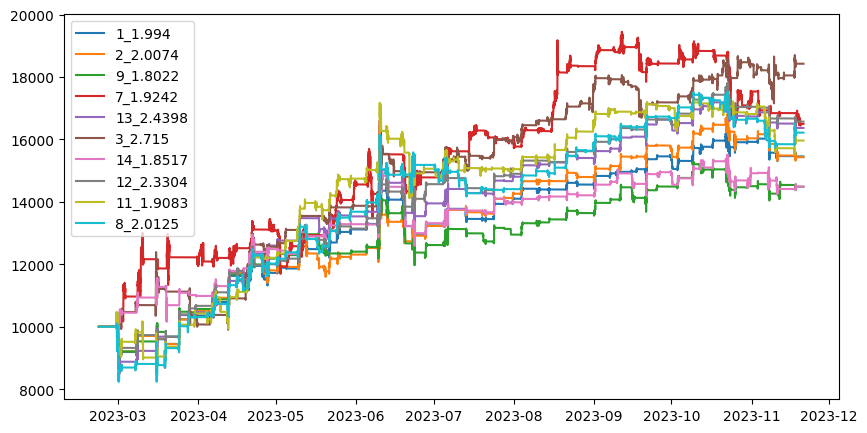

kd_smoother DYDX in 1h, long direction.


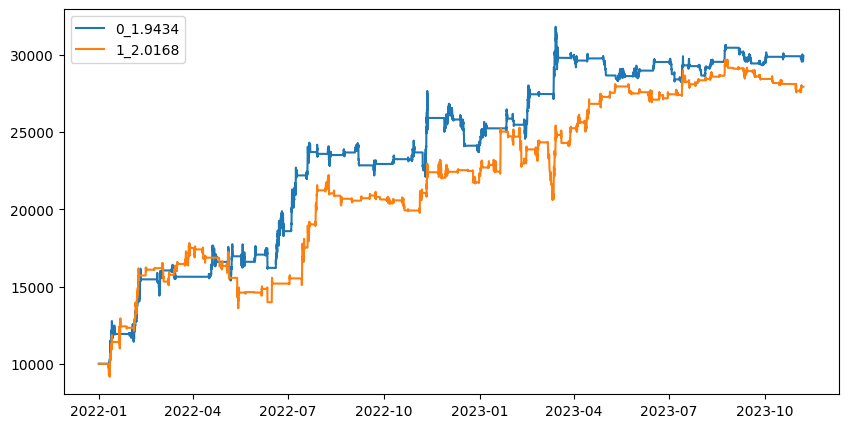

kd_smoother OP in 1h, long direction.


KeyboardInterrupt: 

<Figure size 1000x500 with 0 Axes>

In [50]:
import os 
import sys
import importlib
import warnings
import pandas as pd
import random
import json
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

from src.strategy.MultiTester import MultiTester

strategy_path = os.path.join(sys.path[0], 'Crypto')
strategy_folders = [folder for folder in os.listdir(strategy_path) if os.path.isdir(os.path.join(strategy_path, folder))]
start = '2022-01-01'

def plot_multi_params(strategy_name,params_dict, freq):
    for coin in params_dict['params'].keys():
        for direction in params_dict['params'][coin].keys():
            if len(params_dict['params'][coin][direction].values()) == 0:
                break
            print(f'{strategy_name} {coin} in {freq}, {direction} direction.')
            plt.figure(figsize=(10,5))
            keys = list(params_dict['params'][coin][direction].keys())
            if len(keys) >= 10:
                random_keys = random.sample(keys, 10)
                keys = random_keys 
            for idx in keys:
                value = params_dict['params'][coin][direction][idx]
                param = value
                config = {'freq':freq, 'lag':1, 'fee': 0.0003, 'weekend_filter': False, 'rv_filter':False}
                df = pd.read_hdf(f'/Users/johnsonhsiao/Desktop/data/{coin}USDT_PERPETUAL.h5')
                strategy = Strategy(df=df.loc[start:], configs=config)
                pf = strategy.strategy(side=direction,params=param)
                stat = pf.stats()
                values = pf.value
                sharpe = round(stat['Sharpe Ratio'],4)
                plt.plot(values.index, values, label=f'{idx}_{sharpe}')
            plt.legend()
            plt.show()
            
for strategy_name in strategy_folders:
    module_name = f'Crypto.{strategy_name}.{strategy_name}'
    strategy_module = importlib.import_module(module_name)
    Strategy = getattr(strategy_module, 'Strategy')
    param_list = os.listdir(f'./Crypto/{strategy_name}/opt/')
    for folder in param_list:
        if '.json' in folder:
            freq = folder.split('_')[0]
            with open(f'./Crypto/{strategy_name}/opt/{folder}', 'r') as file:
                params_dict = json.load(file)
                plot_multi_params(strategy_name,params_dict, freq)

In [1]:
import os 
import sys
import importlib
import warnings
import pandas as pd
import random
import json
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

from src.strategy.MultiTester import MultiTester

strategy_path = os.path.join(sys.path[0], 'Crypto')
strategy_folders = [folder for folder in os.listdir(strategy_path) if os.path.isdir(os.path.join(strategy_path, folder))]
start = '2022-01-01'

candidate_coin = {}
candidate_coin['5T'] = {}
candidate_coin['15T'] = {}
candidate_coin['1h'] = {}
candidate_coin['4h'] = {}

for strategy_name in strategy_folders:
    candidate_coin['5T'][strategy_name] = []
    candidate_coin['15T'][strategy_name] = []
    candidate_coin['1h'][strategy_name] = []
    candidate_coin['4h'][strategy_name] = [] 
    module_name = f'Crypto.{strategy_name}.{strategy_name}'
    strategy_module = importlib.import_module(module_name)
    Strategy = getattr(strategy_module, 'Strategy')
    param_list = os.listdir(f'./Crypto/{strategy_name}/opt/')
    for folder in param_list:
        if '.json' in folder:
            freq = folder.split('_')[0]
            with open(f'./Crypto/{strategy_name}/opt/{folder}', 'r') as file:
                params_dict = json.load(file)
                candidate_coin[freq][strategy_name].append(list((params_dict['params'].keys())))
                

In [4]:
for key in candidate_coin.keys():
    print(key)
    print(candidate_coin[key]['ma_triple'])

5T
[['RUNE', 'GMT']]
15T
[['AVAX', 'OP', 'RUNE', 'ARB', 'GMT', 'LDO', 'APT', 'WAVES', 'STX']]
1h
[['OP', 'ARB', 'GMT', 'INJ', 'APT', 'WAVES', 'FET']]
4h
[['OP', 'GMT', 'INJ', 'APT']]


In [2]:
coin_count = {}
for freq, value in candidate_coin.items():
    for strategy, _ in value.items():
        for temp in _:
            if len(temp) != 0:
                for coin in temp:
                    if coin not in coin_count.keys():
                        coin_count[coin] = 0
                    coin_count[coin] += 1
        
coin_count

{'GMT': 13,
 'APT': 14,
 'FET': 12,
 'STX': 10,
 'LTC': 1,
 'OMG': 1,
 'BLUR': 6,
 'GRT': 3,
 'RUNE': 6,
 'INJ': 12,
 '1000SHIB': 1,
 'NEO': 1,
 'LDO': 5,
 'TRX': 1,
 'OP': 10,
 'WAVES': 6,
 'DYDX': 2,
 'ARB': 7,
 'AVAX': 1,
 'ETC': 2,
 'FTM': 2,
 'AAVE': 1,
 'GALA': 1,
 'EOS': 1,
 'NEAR': 1,
 'BTC': 1,
 'SUSHI': 1}